# MLE

In [1]:
import importlib

In [2]:
import toolbox
importlib.reload(toolbox)

<module 'toolbox' (namespace)>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from toolbox import fits
from toolbox import vis
from toolbox import as_toolbox as ast
from matplotlib.ticker import MaxNLocator
from iminuit import Minuit
#import toolbox.as_toolbox as ast
importlib.reload(toolbox)

<module 'toolbox' (namespace)>

In [99]:
gauss1 = stats.norm.rvs(size = 4, loc = 1.25, scale = 0.11, random_state = 1)
gauss2 = stats.norm.rvs(size = 4, loc = 1.3, scale = 0.5, random_state = 1)
Gauss = [gauss1, gauss2]

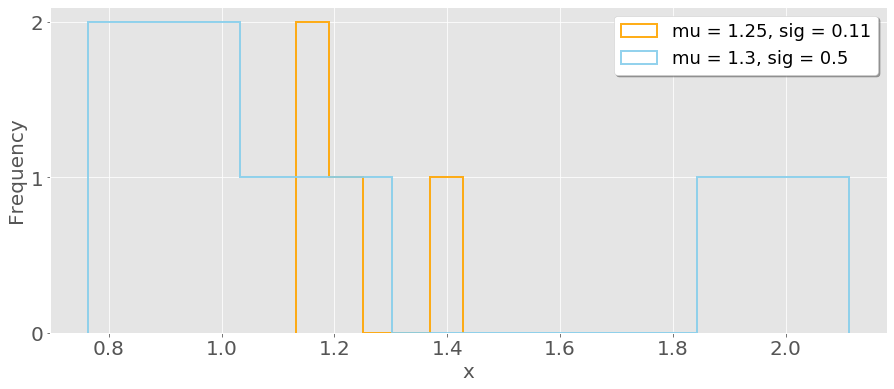

In [100]:
fig, ax = plt.subplots(figsize = (15,6))
colors = ['orange', 'skyblue']
Labels = ['mu = 1.25, sig = 0.11', 'mu = 1.3, sig = 0.5' ]
bins = 5
for i in range(2):
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    x, y, sy, binwidth, fig, ax = vis.nice_histogram(Gauss[i], bins, color_hist = colors[i], plot_hist = True, plot_errors = False, show_plot = False,
                      axis = ax, figure = fig, plot_legend=True, data_label_hist= Labels[i])
fig

 ## Ex1 

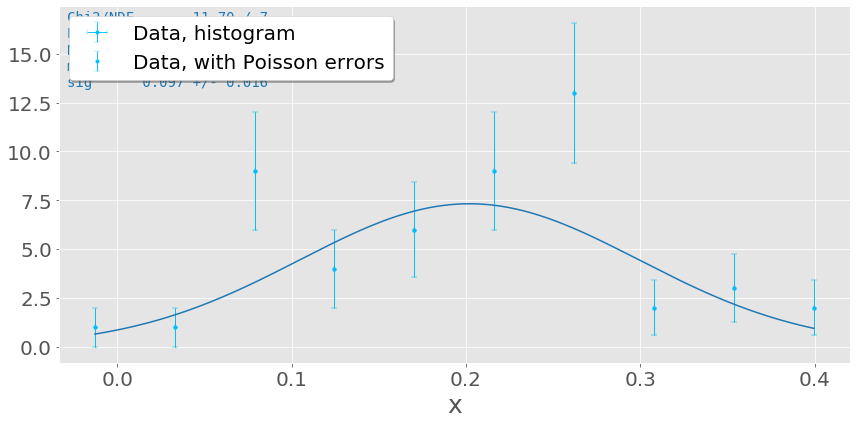

In [179]:
N = 50 #number of random points
bins = 10
def LLH(mu, sig, x, axis =2): return np.sum(np.log(stats.norm.pdf(x, loc = mu, scale = sig)), axis = axis)
mu, sig = 0.2, .1
gauss = stats.norm.rvs(size = N, loc = mu, scale = sig, random_state = 4) #generate random points

x, y, sy, binwidth, fig, ax = vis.nice_histogram(gauss, bins, plot_hist = False, plot_errors = True, show_plot = False, plot_legend=False,
                                                data_label_hist='MC')
xaxis = np.linspace(-.1,.5,100)
yaxis = N*binwidth*stats.norm.pdf(xaxis, mu,sig)
#ax, fig = vis.nice_plot(xaxis, yaxis, axis = ax, figure = fig, show_plot=False,color = 'limegreen', data_label = 'f(x)*binwidth*N')
def func_gauss(x, N, mu,sig): return binwidth*N*stats.norm.pdf(x, loc = mu, scale = sig)#
kwargs = {'axis':ax, 'figure':fig}
ax, fig, Popt, Pcov =  fits.chi2_fit_func(x,y,sy+1e-9,func_gauss, p0 = [100,0.21,.14], kwargs = kwargs)#no option for unbinned llh
fig

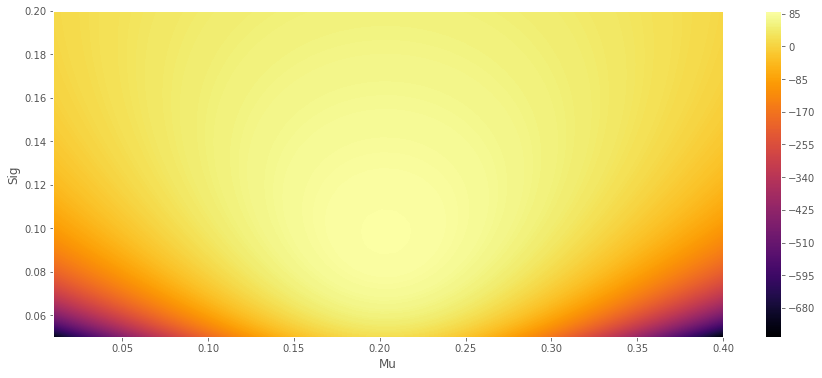

In [25]:
#sparse grid
#generate grid
mu_test = np.linspace(.01,.4,50)
sig_test = np.linspace(0.05, 0.2, 50)
MU, SIG = np.meshgrid(mu_test, sig_test)
MU3 = np.expand_dims(MU, 2)
MU3 = np.repeat(MU3, N, axis = 2)
SIG3 = np.expand_dims(SIG, 2)
SIG3= np.repeat(SIG3, N, axis = 2)
#comput LLH on the grid
llh = LLH(MU3, SIG3, gauss)
fig, ax = plt.subplots(figsize = (15,6))
pos = ax.contourf(MU, SIG, llh, cmap='inferno', levels = 400)
ax.set_xlabel('Mu')
ax.set_ylabel('Sig')
fig.colorbar(pos, ax=ax)

In [ ]:
#analytical 
llh_anal = LLH(mu, sig, gauss, axis = 0)
llh_rs = llh[np.where(llh==llh.max())[0][0], np.where(llh==llh.max())[1][0]]
llh_rs, llh_anal #comparison between raster scan and analytic

## Exercise 2

In [21]:
alpha, beta = .5, .5
C = 1/(2+2/3*beta)
def func(x, aplha = alpha, beta = beta): return C*(1 + alpha*x + beta*x**2)

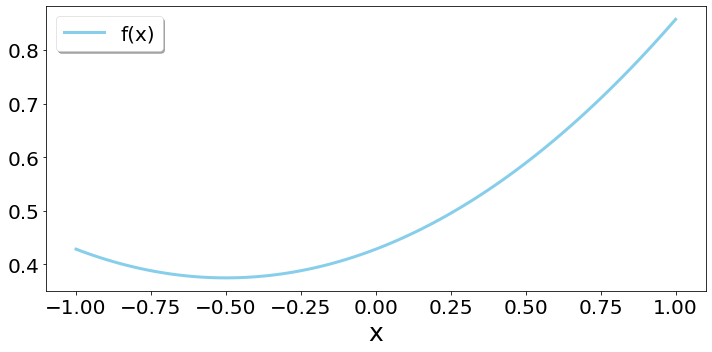

In [22]:
xaxis = np.linspace(-1,1,100)
yaxis = func(xaxis)
_ = vis.nice_plot(xaxis, yaxis, data_label = 'f(x)')

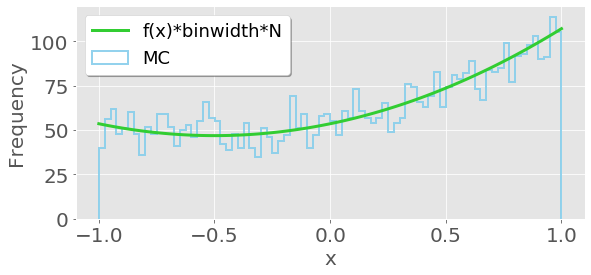

In [23]:
#generate points
N = 5000
n_bins = 80
xmin, xmax = -1, 1
binwidth = 2/n_bins
ymin, ymax = func(-alpha/(2*beta), alpha, beta), func(xmax, alpha, beta)
x_rand = ast.accept_reject(func, N, xmin, xmax, ymin, ymax)
fig, ax = plt.subplots(figsize = (8,4))
xaxis = np.linspace(-1,1,100)
yaxis = N*func(xaxis)*binwidth
ax, fig = vis.nice_plot(xaxis, yaxis, axis = ax, figure = fig, show_plot=False,color = 'limegreen', data_label = 'f(x)*binwidth*N')
_ = vis.nice_histogram(x_rand, n_bins, axis = ax, figure = fig, show_plot = True, plot_errors=False, plot_hist=True, data_label_hist = 'MC',
                      plot_legend = True, color_hist = 'skyblue')
fig